In [2]:
%load_ext autoreload
%autoreload 2

In [17]:
from auto_encoder import AutoEncoder
from stacked_mnist import StackedMNISTData, DataMode
import numpy as np
import matplotlib.pyplot as plt
from verification_net import VerificationNet
from utils import display_images

# Setting up model

In [30]:
auto_encoder = AutoEncoder(latent_dim=20)
auto_encoder.model.summary()

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_23 (Conv2D)          (None, 13, 13, 32)        320       
                                                                 
 conv2d_24 (Conv2D)          (None, 6, 6, 48)          13872     
                                                                 
 conv2d_25 (Conv2D)          (None, 2, 2, 64)          27712     
                                                                 
 flatten_9 (Flatten)         (None, 256)               0         
                                                                 
 dense_32 (Dense)            (None, 128)               32896     
                                                                 
 dense_33 (Dense)            (None, 20)                258

In [31]:
auto_encoder.train(force_relearn=True)

./models/ae
Epoch 1/10
469/469 [==============================] - 37s 77ms/step - loss: 0.1804 - val_loss: 0.0948
Epoch 2/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0816 - val_loss: 0.0723
Epoch 3/10
469/469 [==============================] - 40s 84ms/step - loss: 0.0672 - val_loss: 0.0622
Epoch 4/10
469/469 [==============================] - 35s 75ms/step - loss: 0.0607 - val_loss: 0.0591
Epoch 5/10
469/469 [==============================] - 41s 88ms/step - loss: 0.0570 - val_loss: 0.0554
Epoch 6/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0549 - val_loss: 0.0542
Epoch 7/10
469/469 [==============================] - 37s 80ms/step - loss: 0.0531 - val_loss: 0.0528
Epoch 8/10
469/469 [==============================] - 35s 74ms/step - loss: 0.0517 - val_loss: 0.0520
Epoch 9/10
469/469 [==============================] - 35s 75ms/step - loss: 0.0507 - val_loss: 0.0508
Epoch 10/10
469/469 [==============================] - 33s 70ms/step -

# Mono images

In [32]:
generator = StackedMNISTData(mode=DataMode.MONO_BINARY_COMPLETE, default_batch_size=2048)
x_test, y_test = generator.get_random_batch(training=False, batch_size=2000)

### Reconstruction results

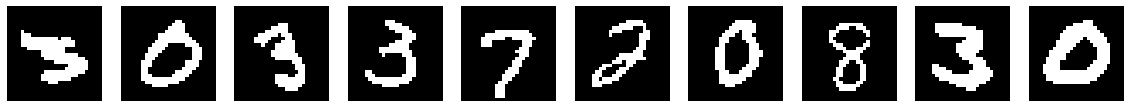

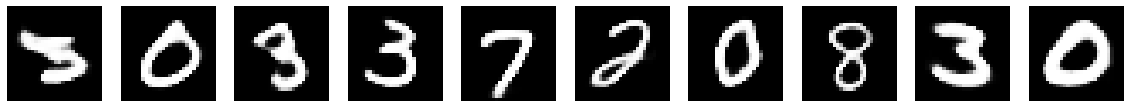

In [33]:
reconstructed = auto_encoder.reconstruct(x_test)

display_images(x_test, 10)
display_images(reconstructed, 10)

In [34]:
net = VerificationNet(force_learn=False, file_name="../models/verification_model")
_, acc_ae = net.check_predictability(data=reconstructed, correct_labels=y_test)
print(f"Accuracy of Reconstruction: {100 * acc_ae:.2f}%")


Accuracy of Reconstruction: 95.00%


### Auto-Encoder as a generator

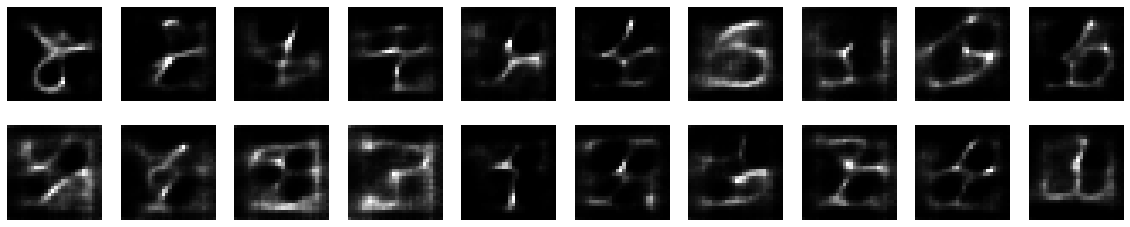

In [35]:
generated = auto_encoder.generate_new_samples()
display_images(generated, 20)

In [36]:
cov = net.check_class_coverage(data=generated, tolerance=0.98)
pred, _ = net.check_predictability(data=generated)
print(f"Coverage: {100*cov:.2f}%")
print(f"Predictability: {100*pred:.2f}%")

Coverage: 10.00%
Predictability: 95.70%


# Color images

In [37]:
generator = StackedMNISTData(mode=DataMode.COLOR_BINARY_COMPLETE, default_batch_size=2048)
x_test, y_test = generator.get_random_batch(training=False, batch_size=2000)
x_test = x_test.astype(np.float64)

### Reconstruction results

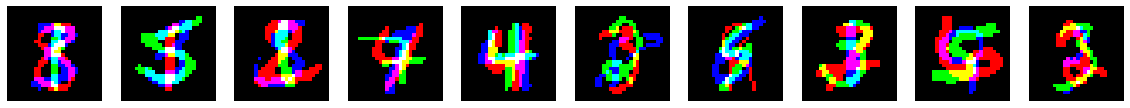

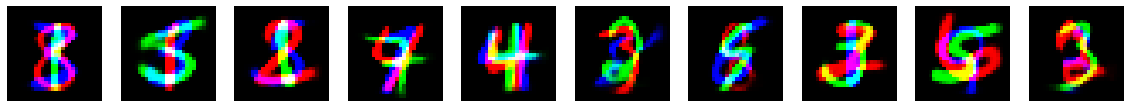

In [38]:
reconstructed = auto_encoder.reconstruct(x_test)

display_images(x_test, 10, color=True)
display_images(reconstructed, 10, color=True)

In [39]:
net = VerificationNet(force_learn=False, file_name="../models/verification_model")
_, acc_ae = net.check_predictability(data=reconstructed, correct_labels=y_test, tolerance=0.5)
print(f"Accuracy of Reconstruction: {100 * acc_ae:.2f}%")

Accuracy of Reconstruction: 90.40%


### Auto-Encoder as a generator

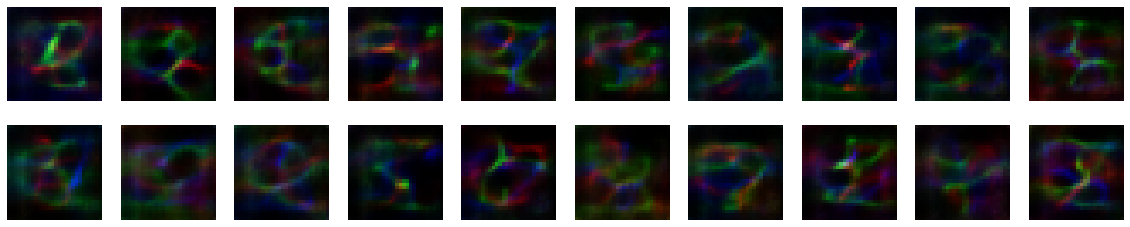

In [28]:
generated = auto_encoder.generate_new_samples(no_channels=3)
display_images(generated, 20, color=True)

In [29]:
cov = net.check_class_coverage(data=generated, tolerance=0.98)
pred, _ = net.check_predictability(data=generated)
print(f"Coverage: {100*cov:.2f}%")
print(f"Predictability: {100*pred:.2f}%")

Coverage: 0.10%
Predictability: 72.80%


# Auto-Encoder as anomaly detector

In [10]:
ae_anomaly = AutoEncoder(latent_dim=20, missing=True)
ae_anomaly.train(force_relearn=True)

Epoch 1/10
424/424 [==============================] - 34s 79ms/step - loss: 0.1806 - val_loss: 0.0994
Epoch 2/10
424/424 [==============================] - 31s 72ms/step - loss: 0.0776 - val_loss: 0.0770
Epoch 3/10
424/424 [==============================] - 30s 70ms/step - loss: 0.0630 - val_loss: 0.0666
Epoch 4/10
424/424 [==============================] - 31s 73ms/step - loss: 0.0565 - val_loss: 0.0613
Epoch 5/10
424/424 [==============================] - 31s 74ms/step - loss: 0.0528 - val_loss: 0.0608
Epoch 6/10
424/424 [==============================] - 34s 80ms/step - loss: 0.0505 - val_loss: 0.0595
Epoch 7/10
424/424 [==============================] - 31s 74ms/step - loss: 0.0487 - val_loss: 0.0589
Epoch 8/10
424/424 [==============================] - 37s 87ms/step - loss: 0.0472 - val_loss: 0.0550
Epoch 9/10
424/424 [==============================] - 33s 77ms/step - loss: 0.0459 - val_loss: 0.0580
Epoch 10/10
424/424 [==============================] - 31s 72ms/step - loss: 0.045

### Mono images

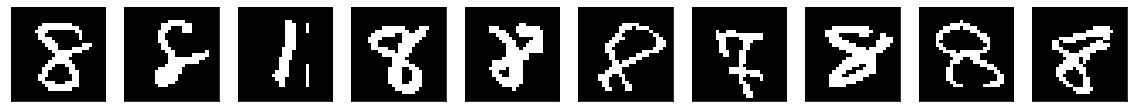

In [11]:
generator = StackedMNISTData(mode=DataMode.MONO_BINARY_COMPLETE, default_batch_size=2048)
x_test, y_test = generator.get_random_batch(training=False, batch_size=2000)

anomalies = ae_anomaly.get_anomalies(x_test)
display_images(x_test[anomalies], 10)

### Color images

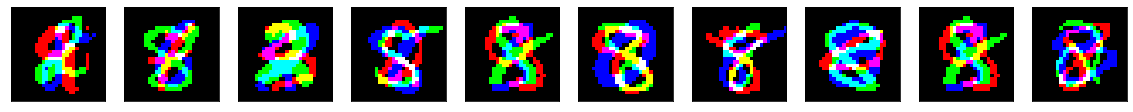

In [13]:
generator = StackedMNISTData(mode=DataMode.COLOR_BINARY_COMPLETE, default_batch_size=2048)
x_test, y_test = generator.get_random_batch(training=False, batch_size=2000)
x_test = x_test.astype(np.float64)

anomalies = ae_anomaly.get_anomalies(x_test)
display_images(x_test[anomalies], 10, color=True)